In [1]:
# Importing dependencies and API key
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import time #for plotting
from scipy.stats import linregress

# Citipy is a dependency we also use in our project work
from citipy import citipy

In [6]:
# Loan CSV file generated
airwater_data_csv = "./Clean_Data/CityCountryClimateWaterAir.csv"
airwater_data_df = pd.read_csv(airwater_data_csv)
# Dropping the Unnamed column
dropna_airwater_data_df = airwater_data_df.dropna()
del dropna_airwater_data_df["Unnamed: 0"]
airwater_data_df = dropna_airwater_data_df
#Displaying headers
airwater_data_df.head(20)





,city,climate,country,subcountry,geonameid,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,punta arenas,EF,Chile,Magallanes,3874787,"""Magellan and the Chilean Antarctic Region""","""Chile""",94.444444,45.000000
1,hermanus,EF,South Africa,Western Cape,3366880,"""Western Cape""","""South Africa""",100.000000,0.000000
2,port elizabeth,EF,South Africa,Eastern Cape,964420,"""Eastern Cape""","""South Africa""",80.263158,56.250000
3,east london,EF,South Africa,Eastern Cape,1006984,"""Eastern Cape""","""South Africa""",70.833333,58.333333
4,busselton,EF,Australia,Western Australia,2075265,"""Western Australia""","""Australia""",90.000000,50.000000
5,albany,EF,Australia,Western Australia,2077963,"""New York""","""United States of America""",87.500000,31.250000
6,albany,EF,Australia,Western Australia,2077963,"""Georgia""","""United States of America""",75.000000,16.666667
7,albany,EF,Australia,Western Australia,2077963,"""Oregon""","""United States of America""",75.000000,12.500000
8,albany,EF,Australia,Western Australia,2077963,"""Western Australia""","""Australia""",84.375000,31.250000
9,albany,EF,United States,Georgia,4179320,"""New York""","""United States of America""",87.500000,31.250000


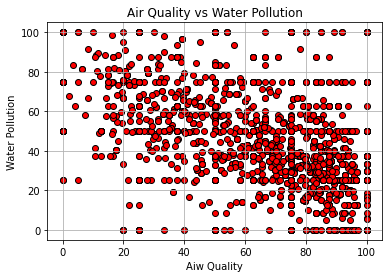

In [11]:
#set data to plot
x = airwater_data_df[" \"AirQuality\""]
y = airwater_data_df[" \"WaterPollution\""]
plt.scatter(x,y,edgecolors="black",facecolors="red")
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Air Quality vs Water Pollution")
plt.xlabel("Aiw Quality")
plt.ylabel("Water Pollution")
#export as png
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution.png')
#display plot!
plt.show()




In [15]:
# x_values: first set of data (always latitude)
# y_values: second set of data (temperature, humidity, cloudiness, wind speed)
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolors="black",facecolors="lightgreen")
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Air Quality')
    plt.ylabel(f'{y_label}')
    plt.grid()

The r-square is -0.44244217168031386
y = -0.36x + 67.61


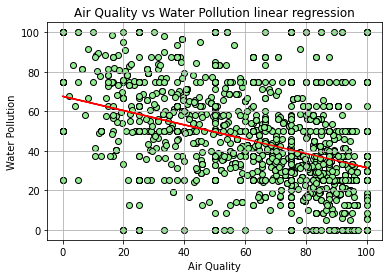

In [17]:
#Chart plotting
x_values = airwater_data_df[" \"AirQuality\""]
y_values = airwater_data_df[" \"WaterPollution\""]

regEQplotX = -25
regEQplotY = 40

y_label = "Water Pollution"
plt.title(f'Air Quality vs Water Pollution linear regression')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution Linear Regression.png')
plt.show()

#There is a slight correlation between air quality and water pollution - the lower the water pollution, the higher the air quality